<font color='maroon' size=5A face="black body"> Get cleaned data </font>



In [1]:
%store -r dbcopy 
%store -r df_task2
%store -r user_behaviour

db = dbcopy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

<br/><font color='gold' size=7A face="black body"> User Engagement analysis </font><br/><br/>
<p> <font color='maroon' size=6A face="black body"> Sub tasks </font></p>
    <ul>
    <li>Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric</li>
    <li>Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.</li>
    <li>Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings</li>
    <li>Aggregate user total traffic per application and derive the top 10 most engaged users per application</li>
    <li>Plot the top 3 most used applications using appropriate charts. </li>
    <li>Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:</li>
    </ul>

In [3]:
df_task2 = db.copy()
df_task2['Total'] = df_task2['Total UL (Bytes)'] + df_task2['Total DL (Bytes)']
df_task2 = df_task2.groupby('MSISDN/Number')\
    .agg({"Bearer Id": "count", 'Dur. (ms)':'sum', 'Total':'sum'})

df_task2.head()

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09


In [4]:
df_task2.sort_values(by='Bearer Id', ascending=False).head(10)

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.360452e+10,12,5207990.0,5.487855e+09
3.376041e+10,12,5321667.0,7.132371e+09


In [5]:
df_task2.sort_values(by='Dur. (ms)', ascending=False).head(10)

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.362632e+10,18,8791927.0,7.971167e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.366284e+10,9,6614270.0,4.000098e+09
3.366469e+10,9,6288730.0,5.682007e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.366746e+10,6,5649882.0,2.600522e+09


In [6]:
df_task2.sort_values(by='Total', ascending=False).head(10)

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
3.361489e+10,17,9966898.0,8.846226e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.362632e+10,18,8791927.0,7.971167e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.366646e+10,11,4536757.0,7.308501e+09
3.376041e+10,12,5321667.0,7.132371e+09
3.366471e+10,11,2927785.0,6.872018e+09


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
df_values = df_task2.values

scalled_values = min_max_scaler.fit_transform(df_values)
df_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [8]:
print(kmeans.cluster_centers_)

[[0.00243665 0.00539687 0.05244423]
 [0.06920048 0.01114454 0.12378152]
 [0.19133265 0.03037245 0.25528336]]


In [9]:
cluster = kmeans.predict(df_normalized)
cluster_df = df_task2.copy()
cluster_df['cluster']  = cluster

In [10]:
cluster_group_df = cluster_df.groupby('cluster')
cluster_0 = cluster_group_df.get_group(0)
cluster_1 = cluster_group_df.get_group(1)
cluster_2 = cluster_group_df.get_group(2)

In [11]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

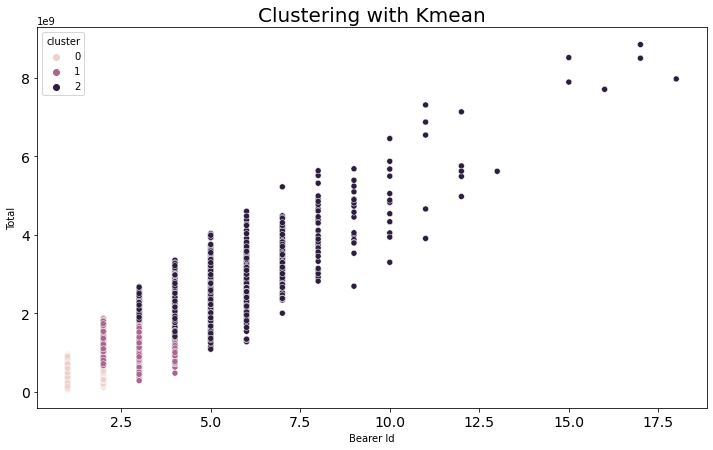

In [12]:

# Cluster 0
plot_scatter(cluster_df, "Bearer Id", "Total","Clustering with Kmean", "cluster", "")

In [13]:
# cluster 0
cluster_0.describe()

,Bearer Id,Dur. (ms),Total,cluster
count,80788.000000,8.078800e+04,8.078800e+04,80788.0
mean,1.042135,1.073046e+05,4.955284e+08,0.0
std,0.200898,7.853286e+04,2.402140e+08,0.0
min,1.000000,7.142000e+03,3.324901e+07,0.0
25%,1.000000,5.651700e+04,2.920891e+08,0.0
50%,1.000000,8.640700e+04,4.970511e+08,0.0
75%,1.000000,1.423710e+05,6.985954e+08,0.0
max,2.000000,1.573420e+06,9.507607e+08,0.0


In [14]:
# cluster 2
cluster_2.describe()

,Bearer Id,Dur. (ms),Total,cluster
count,4050.000000,4.050000e+03,4.050000e+03,4050.0
mean,4.252593,5.703911e+05,2.282820e+09,2.0
std,1.233495,6.668936e+05,6.530793e+08,0.0
min,3.000000,4.689600e+04,1.085994e+09,2.0
25%,4.000000,3.351462e+05,1.886236e+09,2.0
50%,4.000000,4.230765e+05,2.138245e+09,2.0
75%,5.000000,5.359730e+05,2.541080e+09,2.0
max,18.000000,1.855375e+07,8.846226e+09,2.0


In [15]:
# total trafic, Application, user -> top to users
engagement = user_behaviour.reset_index().copy()

# Social Media engagement
engagement[['MSISDN/Number','Total Social Media']].sort_values(by='Total Social Media',ascending=False).head(10)

,MSISDN/Number,Total Social Media
51453,3.366318e+10,6081804.0
32957,3.365887e+10,6081604.0
56324,3.366451e+10,6081388.0
61411,3.366601e+10,6081379.0
48236,3.366241e+10,6081303.0
56918,3.366468e+10,6081274.0
21729,3.364722e+10,6081242.0
22873,3.365002e+10,6080979.0
48008,3.366237e+10,6080417.0
101536,3.376915e+10,6080396.0


In [16]:
# Google Engagement
engagement[['MSISDN/Number','Total Google']].sort_values(by='Total Google',ascending=False).head(5)

,MSISDN/Number,Total Google
41965,3.366091e+10,24775247.0
35241,3.365935e+10,24775169.0
38690,3.366015e+10,24772983.0
72255,3.366960e+10,24770765.0
32720,3.365882e+10,24770000.0


In [17]:
engagement[['MSISDN/Number','Total Gaming']].sort_values(by='Total Gaming',ascending=False).head(5)

,MSISDN/Number,Total Gaming
66706,3.366775e+10,1.433029e+09
98046,3.376271e+10,1.432997e+09
50261,3.366288e+10,1.432967e+09
66122,3.366758e+10,1.432962e+09
36201,3.365957e+10,1.432707e+09


In [18]:
data = []

# Remove 'MSISDN/Number' and 'Total' from columns list
columns = user_behaviour.columns.tolist()[1:-1]

for column in columns:
    data.append(user_behaviour[column].sum())

data_df = pd.DataFrame({"Application": columns, "counts":data})

data_df.sort_values(by='counts', ascending=False)[:3]

,Application,counts
3,Total Gaming,5.661715e+13
4,Total Other,5.646044e+13
1,Total Youtube,2.990166e+12


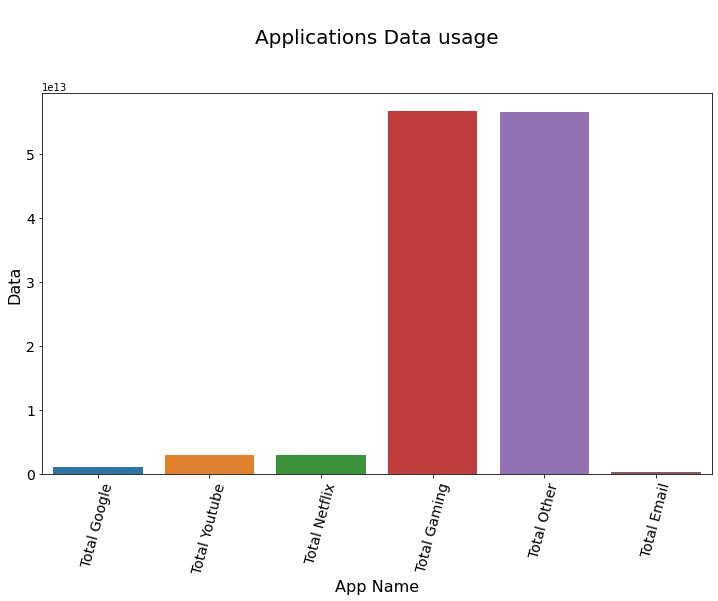

In [19]:
plot_bar(data_df,data_df['Application'], data_df['counts'], "\nApplications Data usage\n\n", "App Name", "Data")

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_normalized)
    distortions.append(kmeanModel.inertia_)

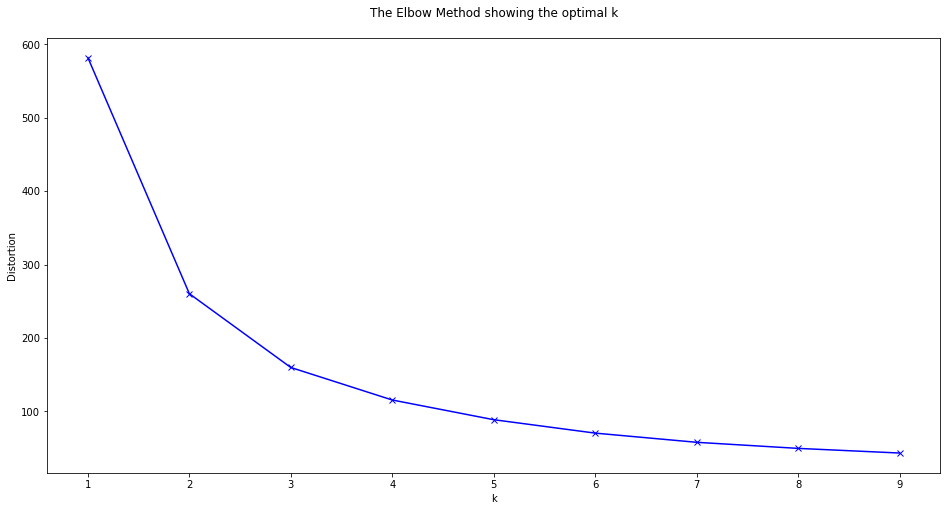

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k\n')
plt.show()

In [25]:
### so Number 3 is the optimum, and we should run with 3 cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

cluster = kmeans.predict(df_normalized)
cluster_df = df_task2.copy()
cluster_df['cluster']  = cluster